In [1]:
import mlrun

In [2]:
import dotenv
import os
import sys
import mlrun
dotenv_file = ".env"
dotenv.load_dotenv(dotenv_file)

True

In [3]:
project_name="workflow-override"
project = mlrun.get_or_create_project(
    name=project_name,
    user_project=False,
    allow_cross_project=True,
    parameters={
        "build_image": False,
        "source": "git://github.com/xsqian/workflow-overrite-default-image.git#main",
        "default_image": f'.mlrun-project-image-{project_name}',
    },
)

Project Source: git://github.com/xsqian/workflow-overrite-default-image.git#main
set deafult image to : .mlrun-project-image-workflow-override
name: structured-data-generator
with_repo: False
name: test-image
with_repo: False

 ----------------------------------------------------------------------------------------------------
kind: project
status:
  state: online
metadata:
  name: workflow-override
  created: '2026-01-11T19:20:18.833000'
spec:
  owner: xingsheng
  load_source_on_run: false
  conda: ''
  desired_state: online
  build:
    source_code_target_dir: /home/mlrun_code/
    image: .mlrun-project-image-workflow-override
    requirements:
    - langchain==0.2.17
    - openai==1.58.1
    - langchain_community==0.2.19
    commands:
    - pip install mlrun langchain==0.2.17 openai==1.58.1 langchain_community==0.2.19
    base_image: mlrun/mlrun-kfp
  functions:
  - url: ./src/test-image.py
    name: test-image
    kind: job
    image: .mlrun-project-image-workflow-override
  - url:

In [4]:
project.spec.params['build_image']=False
project.save()

In [5]:
project.spec.params['default_image']

'.mlrun-project-image-workflow-override'

In [6]:
# f_run = mlrun.run_function("test-image", name="f1", handler="handler")

<a id="gs-tutorial-4-step-setting-up-project"></a>

<a id="gs-tutorial-4-step-register-workflow"></a>

**Run the workflow**

> 2026-01-13 21:54:50,973 [info] Submitting remote workflow: {"project_name":"workflow-override","schedule":null,"workflow_engine":"kfp"}


> 2026-01-13 21:54:56,695 [info] Started run workflow workflow-override-test-image-in-workflow with run id = 'a73aa696-5d05-4083-a96d-db80b319de20' by remote engine
> 2026-01-13 21:54:56,695 [info] Waiting for pipeline run completion: {"project":"workflow-override","run_id":"a73aa696-5d05-4083-a96d-db80b319de20"}


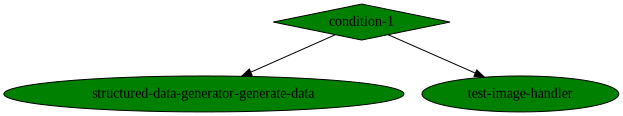

uid,start,end,state,kind,name,parameters,results
...592ab3ea,Jan 13 21:55:03,2026-01-13 21:55:12.066923+00:00,completed,run,structured-data-generator-generate-data,"amount=2model_name=gpt-4language=enfields=['first_name: in english, no special characters', 'last_name: in english, no special characters', 'phone_number', 'email', 'client_id: no leading zeros, at least 8 digits long, only numbers, this is a primay key field for the database, avoid duplicates as much as possible', 'client_city: Enter city, state in the US (e.g., Austin, TX), Not only Texas', 'latitude: That correspond to the city', 'longitude: That correspond to the city']",
...77c0370c,Jan 13 21:55:03,2026-01-13 21:55:03.777698+00:00,completed,run,test-image-handler,,


In [7]:
# Run the workflow
run_id = project.run(
    "test-image-in-workflow",
    arguments={
    "amount": 5,
    "num_clients": 2,
    "num_agents": 2,
    "generation_model": "gpt-4",
    "tts_model": "tts-1",
    "language":  "en",
    "available_voices": [
        "alloy", "echo", "fable", "onyx", "nova", "shimmer"
    ],
    "min_time": 2,
    "max_time": 5,
    "from_date": "08.15.2024",
    "to_date": "08.14.2025",
    "from_time": "09:00",
    "to_time": "17:00",
    "generate_clients_and_agents": True,
    },
    engine="remote",
    watch=False,
    dirty=True,
    timeout=60,
)